# Demarrage

##Importation des lib

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


import spacy




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Montage du Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

my_local_drive='/content/gdrive/My Drive/ProjetML/Dataset'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd



Mounted at /content/gdrive/
/content/gdrive/My Drive/ProjetML/Dataset


'/content/gdrive/My Drive/ProjetML/Dataset'

## Importation DataSet et Fusion

In [3]:
# Charger les fichiers CSV dans des dataframes pandas
train_df = pd.read_csv('HAI817_Projet_train.csv')
test_df = pd.read_csv('HAI817_Projet_test.csv')

# Afficher le nombre d'éléments pour chaque dataset
print("Nombre d'éléments dans le dataset d'entraînement :", len(train_df))
print("Nombre d'éléments dans le dataset de test :", len(test_df))

# Fusionner les deux dataframes en un seul
df = pd.concat([train_df, test_df], ignore_index=True)

print("Nombre d'éléments dans le dataset de train and test :", len(df))

Nombre d'éléments dans le dataset d'entraînement : 1264
Nombre d'éléments dans le dataset de test : 612
Nombre d'éléments dans le dataset de train and test : 1876


#Visualisation

##Etat initial du dataset

In [4]:
display(df.head())

,public_id,text,title,our rating,ID
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,NaN
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,NaN
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,NaN
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,NaN
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,NaN


##Valeurs Nulles

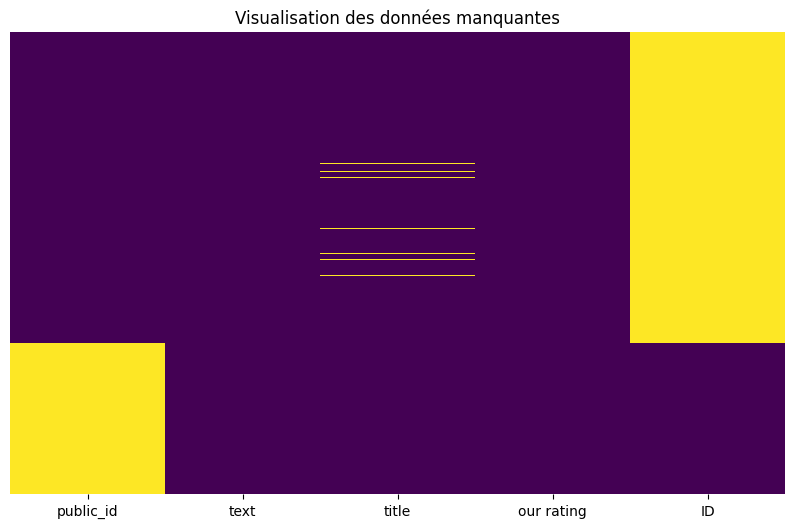

In [5]:
# Calculer les valeurs manquantes
vals_manquantes = df.isnull()

# Créer une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(vals_manquantes, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualisation des données manquantes')
#plt.savefig('../Graphes/heatMap_valeurs_manquantes.png')
plt.show()


##Nombre de valeurs nulles et %

In [6]:
# Compter le nombre de lignes avec des valeurs nulles
nombre_lignes_nulles = df.isnull().any(axis=1).sum()

# Calculer le pourcentage de lignes avec des valeurs nulles
pourcentage_lignes_nulles = (nombre_lignes_nulles / len(df)) * 100

# Afficher les résultats
print("Nombre de lignes avec des valeurs nulles :", nombre_lignes_nulles)
print("Pourcentage de lignes avec des valeurs nulles :", pourcentage_lignes_nulles)


Nombre de lignes avec des valeurs nulles : 1876
Pourcentage de lignes avec des valeurs nulles : 100.0


##Informations sur les colonnes du dataset

In [7]:
print("Les différentes informations associées aux colonnes")
df.info()

Les différentes informations associées aux colonnes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   public_id   1264 non-null   object
 1   text        1876 non-null   object
 2   title       1853 non-null   object
 3   our rating  1876 non-null   object
 4   ID          612 non-null    object
dtypes: object(5)
memory usage: 73.4+ KB


##Repartion Our_Rating

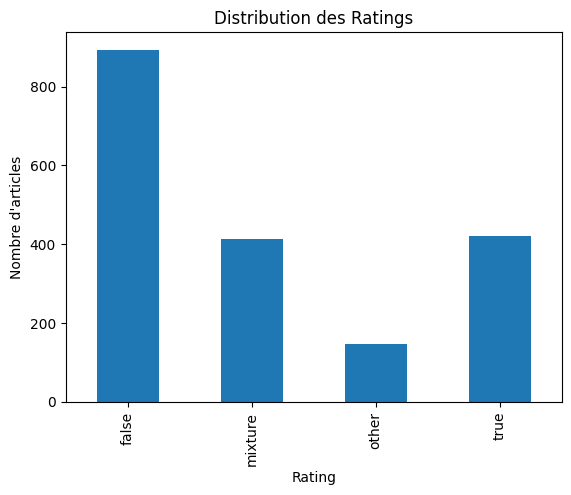

In [8]:
rating_counts = df['our rating'].value_counts().sort_index()

# Tracer un diagramme à barres pour visualiser la distribution des ratings
rating_counts.plot(kind='bar')
plt.title('Distribution des Ratings')
plt.xlabel('Rating')
plt.ylabel('Nombre d\'articles')
#plt.savefig('../Graphes/Distribution_ratings.png')
plt.show()


#Prétraitement

##Drop des Ids

In [9]:
colonnesDrop = ['public_id', 'ID']
df = df.drop(colonnesDrop, axis=1)
display(df.head())

,text,title,our rating
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false


In [10]:
print("Nombre d'éléments dans le dataset de test :", len(df))

Nombre d'éléments dans le dataset de test : 1876


##Supression des valeurs nulles (<5%)

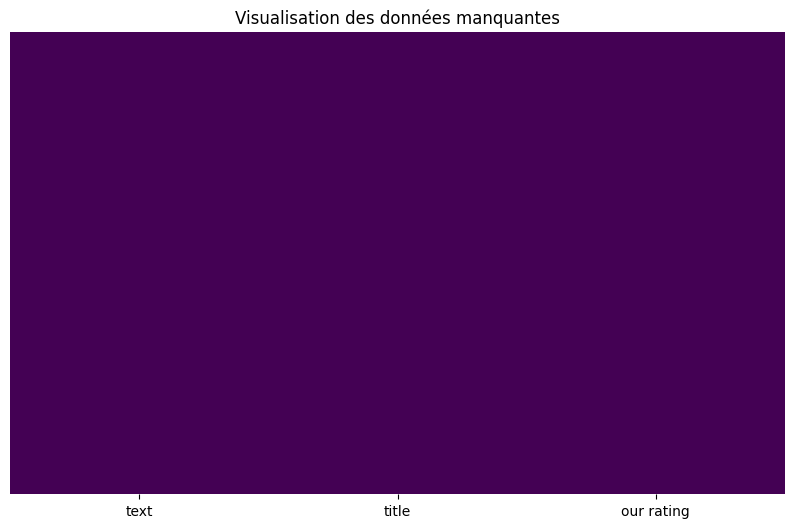

In [11]:
df = df.dropna()
# Calculer les valeurs manquantes
vals_manquantes = df.isnull()

# Créer une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(vals_manquantes, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualisation des données manquantes')
plt.show()

## Fusion de tilte et text

In [12]:
# Fusionner les colonnes 'title' et 'text' en une nouvelle colonne 'combined'
df['combined'] = df['title'] + " " + df['text']
display(df.head())

,text,title,our rating,combined
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U..."
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...


##LowerCase


In [13]:
def lower_case(text):
  return text.map(lambda x: x if type(x)!=str else x.lower())


df['combined_with_lowercase'] = lower_case(df['combined'])

display(df.head())

,text,title,our rating,combined,combined_with_lowercase
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u..."
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...


##Enlever les StopWords

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(filtered_tokens)

df['combined_without_stopwords'] = df['combined'].apply(remove_stop_words)

df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,title,our rating,combined,combined_with_lowercase,combined_without_stopwords
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u...",fined passenger using mobile phone starting ne...
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,missouri lawmakers condemn las vegas shooting ...
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...,cbc cuts donald trump alone cameo broadcast ho...
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...,obama daughters caught camera burning us flag ...
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...,leaked visitor logs reveal schiff visits epste...


##Lematization

###Avec Spacy

In [15]:
# Charger le modèle SpaCy en anglais
nlp = spacy.load("en_core_web_sm")

def lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text


# Appliquer la lemmatisation sur les colonnes 'text' et 'title'
df['combined_with_lemmatization'] = df['combined'].apply(lemmatize)

# Afficher les premières lignes du DataFrame
df.head()

,text,title,our rating,combined,combined_with_lowercase,combined_without_stopwords,combined_with_lemmatization
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u...",fined passenger using mobile phone starting ne...,"you can be fine $ 1,500 if your passenger be u..."
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,Missouri lawmaker condemn Las Vegas shoot Miss...
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...,cbc cuts donald trump alone cameo broadcast ho...,CBC Cuts Donald Trump 's ' home alone 2 ' Came...
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...,obama daughters caught camera burning us flag ...,Obama ’s daughter catch on Camera burn US Flag...
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...,leaked visitor logs reveal schiff visits epste...,Leaked Visitor Logs Reveal Schiff ’s 78 visit ...


###Avec NLTK

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_with_nltk(text):
    # Diviser la phrase en mots individuels
    words = text.split()
    # Lemmatiser chaque mot et les stocker dans une liste
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Joindre les mots lemmatisés en une seule chaîne
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

df['combined_with_lemmatization'] = df['combined_with_lemmatization'].apply(lemmatize_with_nltk)

# Afficher les premières lignes du DataFrame
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,title,our rating,combined,combined_with_lowercase,combined_without_stopwords,combined_with_lemmatization
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u...",fined passenger using mobile phone starting ne...,"you can be fine $ 1,500 if your passenger be u..."
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,Missouri lawmaker condemn Las Vegas shoot Miss...
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...,cbc cuts donald trump alone cameo broadcast ho...,CBC Cuts Donald Trump 's ' home alone 2 ' Came...
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...,obama daughters caught camera burning us flag ...,Obama ’s daughter catch on Camera burn US Flag...
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...,leaked visitor logs reveal schiff visits epste...,Leaked Visitor Logs Reveal Schiff ’s 78 visit ...


##Application de lower_case, stopword, lemmatization

In [17]:
df['combined_with_all'] = lower_case(df['combined_with_lemmatization'])

df['combined_with_all'] = df['combined_with_all'].apply(remove_stop_words)

In [18]:
df.head()

,text,title,our rating,combined,combined_with_lowercase,combined_without_stopwords,combined_with_lemmatization,combined_with_all
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u...",fined passenger using mobile phone starting ne...,"you can be fine $ 1,500 if your passenger be u...",fine passenger use mobile phone start next wee...
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,Missouri lawmaker condemn Las Vegas shoot Miss...,missouri lawmaker condemn las vegas shoot miss...
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...,cbc cuts donald trump alone cameo broadcast ho...,CBC Cuts Donald Trump 's ' home alone 2 ' Came...,cbc cuts donald trump home alone cameo broadca...
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...,obama daughters caught camera burning us flag ...,Obama ’s daughter catch on Camera burn US Flag...,obama daughter catch camera burn us flag dc pr...
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...,leaked visitor logs reveal schiff visits epste...,Leaked Visitor Logs Reveal Schiff ’s 78 visit ...,leaked visitor logs reveal schiff visit epstei...


##Separtion des classes

In [19]:
# Function to map 'our_rating' column to 1, 0, or null based on conditions
def map_true_false(value):
    if value == 'true':
        return 1
    elif value == 'false':
        return 0
    else:
        return -1

# Function to merge 'true' and 'false' to 0, 'mixture' to 1, and other to null
def map_trueAndFalse_mixture(value):
    if value in ['true', 'false']:
        return 0
    elif value == 'mixture':
        return 1
    else:
        return -1

def map_all(value):
    if value == 'true':
        return 1
    elif value == 'false':
        return 0
    elif value == 'mixture':
        return 2
    else:
        return 3

# Applying the functions to create new columns
df['rating_true_false'] = df['our rating'].apply(map_true_false)
df['rating_true_false_vs_mixture'] = df['our rating'].apply(map_trueAndFalse_mixture)
df['rating_all'] = df['our rating'].apply(map_all)

df.head()

,text,title,our rating,combined,combined_with_lowercase,combined_without_stopwords,combined_with_lemmatization,combined_with_all,rating_true_false,rating_true_false_vs_mixture,rating_all
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u...",fined passenger using mobile phone starting ne...,"you can be fine $ 1,500 if your passenger be u...",fine passenger use mobile phone start next wee...,0,0,0
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,Missouri lawmaker condemn Las Vegas shoot Miss...,missouri lawmaker condemn las vegas shoot miss...,-1,1,2
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...,cbc cuts donald trump alone cameo broadcast ho...,CBC Cuts Donald Trump 's ' home alone 2 ' Came...,cbc cuts donald trump home alone cameo broadca...,-1,1,2
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...,obama daughters caught camera burning us flag ...,Obama ’s daughter catch on Camera burn US Flag...,obama daughter catch camera burn us flag dc pr...,0,0,0
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...,leaked visitor logs reveal schiff visits epste...,Leaked Visitor Logs Reveal Schiff ’s 78 visit ...,leaked visitor logs reveal schiff visit epstei...,0,0,0


##Après le prétraitement

## sauvegarde des donnees

In [20]:
chemin_fichier = '/content/gdrive/My Drive/ProjetML/Dataset/donnees_pretraitees.csv'
df.to_csv(chemin_fichier, index=False)